In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hrtrain=pd.read_csv('/content/drive/MyDrive/HR Analytics/train_LZdllcl.csv')

In [ ]:
hrtest=pd.read_csv('/content/drive/MyDrive/HR Analytics/test_2umaH9m.csv')

In [ ]:
hrtrain.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
is_promoted                0
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [ ]:
hrtest.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [ ]:
# Dependent Variable - is_promoted (0/1)(No/Yes)
hrtrain.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:
# How many Male/Female Promoted?
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [ ]:
# Hypothesis Testing
# Type 1 Error - Finding Criminal Not Guilty - Accepting a False
# Hypothesis. Patient has No Covid but RTPCR Test gave Positive
# Type 2 Error - Hanging an innocent Man - Rejecting a True 
# Hypothesis. Patient has Covid but RTPCR Test gave Negative

In [ ]:
hrtrain.previous_year_rating.value_counts(dropna=False)

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
NaN     4124
Name: previous_year_rating, dtype: int64

In [ ]:
hrtrain.previous_year_rating=hrtrain.previous_year_rating.fillna(3.0)

In [ ]:
hrtest.previous_year_rating.value_counts(dropna=False)

3.0    7921
5.0    5097
4.0    4249
1.0    2680
NaN    1812
2.0    1731
Name: previous_year_rating, dtype: int64

In [ ]:
hrtest.previous_year_rating=hrtest.previous_year_rating.fillna(3.0)

In [ ]:
hrtrain.education.value_counts(dropna=False)

Bachelor's          36669
Master's & above    14925
NaN                  2409
Below Secondary       805
Name: education, dtype: int64

In [ ]:
hrtrain.education=hrtrain.education.fillna("Bachelor's")

In [ ]:
hrtest.education=hrtest.education.fillna("Bachelor's")

In [ ]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
# Test Null Average avg_training_score of is_promoted(0/1) Equal
# groupby(), Null & Alt, Split Dataframe, Conduct test & Interpret
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).mean()

is_promoted
0    62.647686
1    71.325193
Name: avg_training_score, dtype: float64

In [ ]:
hrtrain.avg_training_score.groupby(hrtrain.is_promoted).var()

is_promoted
0    168.791268
1    217.448116
Name: avg_training_score, dtype: float64

In [ ]:
promotedyes=hrtrain[hrtrain.is_promoted==1]
promotedno=hrtrain[hrtrain.is_promoted==0]

In [ ]:
# Null - No Significant difference in Average avg_training_score of
# is_promoted(0/1) equal.
# Alt - Significant difference in Average avg_training_score of
# is_promoted(0/1) equal.

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
ttest_ind(promotedyes.avg_training_score,
          promotedno.avg_training_score,equal_var=False)
# Since pvalue=7.662329172468838e-291 is less than 0.05,Reject
# Null Hypothesis

Ttest_indResult(statistic=38.82675007357188, pvalue=7.662329172468838e-291)

In [ ]:
# Test Null Average avg_training_score of Female & Male Equal
# groupby(), Null & Alt, Split Dataframe, Conduct test & Interpret
hrtrain.avg_training_score.groupby(hrtrain.gender).mean()

gender
f    63.889897
m    63.173550
Name: avg_training_score, dtype: float64

In [ ]:
male=hrtrain[hrtrain.gender=='m']
female=hrtrain[hrtrain.gender=='f']

In [ ]:
ttest_ind(male.avg_training_score,female.avg_training_score,
         equal_var=False)

Ttest_indResult(statistic=-6.122262326710493, pvalue=9.321257169457923e-10)

In [ ]:
# ttest=t statistic=(Mean1-Mean2)/sqrt((var1/n1)+(var2/n2))

In [ ]:
# Test Null avg_training_score of different education levels equal
# groupby(), Null & Alt, Split Dataframe, Conduct test & Interpret

In [ ]:
hrtrain.avg_training_score.groupby(hrtrain.education).mean()

education
Bachelor's          63.097446
Below Secondary     64.925466
Master's & above    64.061240
Name: avg_training_score, dtype: float64

In [ ]:
ug=hrtrain[hrtrain.education=="Bachelor's"]
pg=hrtrain[hrtrain.education=="Master's & above"]
bs=hrtrain[hrtrain.education=="Below Secondary"]

In [ ]:
from scipy.stats import f_oneway

In [ ]:
f_oneway(ug.avg_training_score,pg.avg_training_score,
        bs.avg_training_score)

F_onewayResult(statistic=33.5035375621275, pvalue=2.873996658407989e-15)

In [ ]:
# Test Null No Association between gender & is_promoted?
# Both Categorical Variables
# Cross tabulation is input

In [ ]:
pd.crosstab(hrtrain.is_promoted,hrtrain.gender)

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(pd.crosstab(hrtrain.is_promoted,
                            hrtrain.gender))
# Since p-value=0.00976509 is less than 0.05, Reject null

(6.677254566546107,
 0.009765091521176657,
 1,
 array([[14922.70617428, 35217.29382572],
        [ 1389.29382572,  3278.70617428]]))

In [ ]:
# MACHINE LEARNING - SUPERVISED LEARNING - CLASSIFICATION MODELS
# IF DEPENDENT VARIABLE(y) IS NON NUMERIC AND CATEGORICAL AND
# BINARY(YES/NO), THEN BINARY LOGISTIC REGRESSION IS USED.
# IF THERE ARE MORE THAN 2 LEVELS THEN MULTINOMIAL LOGISTIC
# REGRESSION IS USED.
# BINARY LOGISTIC REGRESSION -
#        EXP^(B0+B1X1+B2X2+B3X3+B4X4+..BnXn)
# P = ------------------------------------------------
#       1 + EXP^(B0+B1X1+B2X2+B3X3+B4X4+..BnXn)
# p - Probability lies between 0 & 1
# EXP - Exponential - 2.718
# B0 - Intercept or Constant
# B1,B2,B3,B4,..Bn - Coefficients
# X1,X2,X3,X4,...Xn - Independent variables
# Equation predicts predicted probability
# Classification Rule for all Classification Models
# probability greater than equal to 0.50 ---- 1 (yes)
# probability less than 0.50 ------ 0  (no)

# Assumptions
# Dependent Variable(y) must be Binary.(yes/no)
# Independent Variables can be both numerical and categorical.
# No Multicollinearity(strong correlation >0.95)
# Exogeneity 
# Sample Size is minimum 50 observations per variable

# Interpreatation of Output
# Accuracy calculated from Confusion Matrix
# intercept + Coefficients

# Confusion Matrix is a 2 X 2 matrix of Actual Class & Predicted
# class. Cross Tabulation of y and predicted y
# Actual Class is positive & Predicted class is Positive  -
# True Positive (TP)
# Actual Class is Positive but Predicted class is Negative -
# False Negative (Type II Error) (FN)
# Actual Class is Negative but Predicted class is Positive -
# False Positive (Type I Error) (FP)
# Actual Class is Negative & Predicted Class is Negative-
# True Negative (TN)

# Primary metric for all Classification Models is
#                      True positive + True negative
# Accuracy = ----------------------------------------------------
#            True positive+FalseNegative+FalsePositive+TrueNegative
# Accuracy must be between 0.70 - 0.90 

#                               True Positive
# Sensitivity or Recall = ------------------------------
#                          True Positive + False Negative
# Sensitivity must be higher closer to 1
# Sensitivity is also called as True Positive Rate (TPR)

#                 True Negative
# Specificty = ------------------------------
#                True Negative + False Positive
# Specificity is als called as True Negative Rate
# Specificity must be higher closer to 1.

#                  True positive
# Precision = -----------------------------
#                True Positive + False Positive
# Precision must be higher closer to 1

#                Precision X Recall
# F1 Score = 2 X -------------------
#                Precision + Recall


In [ ]:
hrtrain.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
objectcolumns=hrtrain[['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating',
                      'KPIs_met >80%', 'awards_won?','is_promoted']]

In [ ]:
numericcolumns=hrtrain[['no_of_trainings', 'age',
                        'avg_training_score','length_of_service']]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
objectcolumnsdummy=objectcolumns.apply(le.fit_transform)

In [ ]:
hrtraindf=pd.concat([numericcolumns,objectcolumnsdummy],axis=1)

In [ ]:
y=hrtraindf.is_promoted
X=hrtraindf.drop('is_promoted',axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression(max_iter=2000)
# Convergence Warning means Not All Coefficients are Calculated

In [ ]:
logregmodel=logreg.fit(X,y)

In [ ]:
logregmodel.score(X,y) # Accuracy from Confusion Matrix

0.9172201138519924

In [ ]:
logitpredict=logregmodel.predict(X)

In [ ]:
pd.crosstab(y,logitpredict)

col_0,0,1
is_promoted,,
0,49948,192
1,4345,323


In [ ]:
(49942+328)/(49942+198+4340+328) # Accuracy = 91.72%

0.9172018683403883

In [ ]:
logregmodel.intercept_

array([-6.80183032])

In [ ]:
pd.DataFrame(logregmodel.coef_,columns=X.columns).transpose()

,0
no_of_trainings,-0.187037
age,-0.020709
avg_training_score,0.046130
length_of_service,0.024285
department,0.082790
region,0.002428
education,0.103645
gender,0.013943
recruitment_channel,0.009376
previous_year_rating,0.334313


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y,logitpredict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     50140
           1       0.63      0.07      0.12      4668

    accuracy                           0.92     54808
   macro avg       0.77      0.53      0.54     54808
weighted avg       0.90      0.92      0.89     54808



In [ ]:
from sklearn.metrics import plot_roc_curve

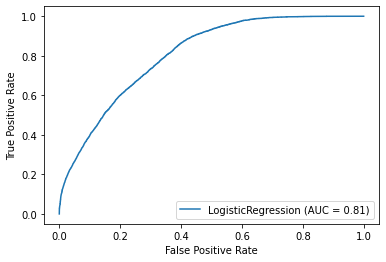

In [ ]:
plot_roc_curve(logreg,X,y)
# Area Under ROC Curve (AUC) = 0.81 or 81%

In [ ]:
#Machine Learning - 
# Supervised Learning - Complete Understanding of Data and which 
# Machine Learning Algorithms to Run.
# UnSupervised Learning _ Dont have complete understanding of data dont
# know what is dependent variable and dont know which algorithms run
# Supervised Learning - 
# Regression Models  - Multiple Linear Regression
# Classification Models - Binary Logistic Regression
# CART Models - Both Regression and Classification Models

# Tree Based Models - Single Tree Model - Decision Tree - CART model
# Decision Tree is Binary Splitting tree with Root Node at beginning and
# Decision nodes where Tree Splits into further decision nodes or
# Terminal Node or Leaf. Output is a Decision Tree diagram.

# From Decision Tree rules will be created and rules are used for 
# prediction. Top Down Reading creates rules when X2>5 & X4=No & X8<150
# then class will be 1.

# Recursive Partitioning Trees - Tree splits on previous decision node
# number of observations not on total number of observations. Tree stops
# growing when all observations are classified into diffferent leaf or
# terminal node.

# Tree Splitting Methods
# 1) Gini Method - 1-Σ(probi)^2
# Gini will be calculated for all independent variables with dependent
# variable. Identiifes Lowest Gini and that variable First Split and in
# Ascending order till 0.40. Gini greater than0.40 will not be consider
# in tree.

# 2) Entropy and Information Gain Method
# Entropy = Σ-probi*log2probi
# Information Gain = Entropy of dependent Variable - Entropy of Variable
# Information Gain is calculated for all independent variables with 
# dependent variable. Highest Information Gain is identified and that
# variable will be first split and descending order till 0.50.
# Information gain less than 0.50 will be deleted from tree.

# Decision tree used as Regression Model (RMSE) & Classifciation Model(
# Accuracy from Confusion Matrix)

# Disadvantage is Overfitting problem. Train data - Accuracy of 98% but
# on repeated testing Accuracy drastically decreases. (Cv=4, 0.70,0.61,
# 0.78,0.64)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier(max_depth=3)

In [ ]:
treemodel=tree.fit(X,y)

In [ ]:
treemodel.score(X,y) # Accuracy - 92.28

0.9231499051233396

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(tree,X,y,cv=5) # Cross Validation or Repeated Testing

array([0.92428389, 0.92245941, 0.92145594, 0.92327342, 0.92363835])

In [ ]:
(0.92391899+0.92163839+0.92145594+0.9226348+0.92309096)/5

0.922547816

In [ ]:
from sklearn.tree import plot_tree

[Text(167.4, 190.26, 'avg_training_score <= 90.5\ngini = 0.156\nsamples = 54808\nvalue = [50140, 4668]'),
 Text(83.7, 135.9, 'KPIs_met >80% <= 0.5\ngini = 0.142\nsamples = 54229\nvalue = [50069, 4160]'),
 Text(41.85, 81.53999999999999, 'awards_won? <= 0.5\ngini = 0.067\nsamples = 35295\nvalue = [34064, 1231]'),
 Text(20.925, 27.180000000000007, 'gini = 0.058\nsamples = 34907\nvalue = [33862, 1045]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.499\nsamples = 388\nvalue = [202, 186]'),
 Text(125.55000000000001, 81.53999999999999, 'avg_training_score <= 88.5\ngini = 0.262\nsamples = 18934\nvalue = [16005, 2929]'),
 Text(104.625, 27.180000000000007, 'gini = 0.257\nsamples = 18717\nvalue = [15883, 2834]'),
 Text(146.475, 27.180000000000007, 'gini = 0.492\nsamples = 217\nvalue = [122, 95]'),
 Text(251.10000000000002, 135.9, 'department <= 0.5\ngini = 0.215\nsamples = 579\nvalue = [71, 508]'),
 Text(209.25, 81.53999999999999, 'avg_training_score <= 93.5\ngini = 0.499\nsamples = 1

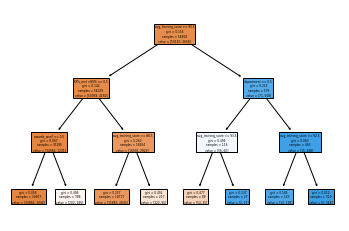

In [ ]:
plot_tree(treemodel,filled=True,feature_names=X.columns)

In [ ]:
hrtest.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
objectcolumns=hrtest[['department', 'region', 'education', 'gender',
       'recruitment_channel','previous_year_rating',
                      'KPIs_met >80%', 'awards_won?']]

In [ ]:
numericcolumns=hrtest[['no_of_trainings', 'age',
                        'avg_training_score','length_of_service']]

In [ ]:
testobjectcolsdummy=objectcolumns.apply(le.fit_transform)

In [ ]:
hrtestdf=pd.concat([numericcolumns,testobjectcolsdummy],axis=1)

In [ ]:
logitpredict=logregmodel.predict(hrtestdf)

In [ ]:
pd.DataFrame(logitpredict).to_csv('logit.csv')

In [ ]:
treepredict=treemodel.predict(hrtestdf)

In [ ]:
pd.DataFrame(treepredict).to_csv('tree.csv')

In [ ]:
# Machine Learning - Supervised Learning - CART Model - MultiTree Models
# Ensemble Meathods - Bagging or Bootstrap Aggregating
# Algorithm - Random Forest - Random(Sampling) & Forest(Multiple trees)
# Step 1 - Specify the number of Tree to be built (n_estimators=1000)
# Step 2 - Create 1000 samples from original data using Random Sampling 
# method for observations and variables. Each sample will have 65% of 
# observations and sqrt(number of variables). Trees will not be built
# untill sampling process ends.
# Data Sampling Method used is Data with Replacement method wherein
# observations and variables appear in multiple samples thereby in
# multiple trees.
# Step 3- Upon completion of sampling decision tree building will start
# and parallely build multiple trees as each sample is independent. One
# Decision Tree for One Sample.
# Step 4 - After building Tree, prediction will also be done for each tree
# Step 5 - Aggregate Outputs of multiple trees and if it is classification
# use Majority Voting method and if it is regression using Average method
# the final prediction of observation will be decided.
# Example - Observation 205 appeared in 450 trees & 270 trees predicted 
# as O or No and 180 trees predicted as 1 or Yes. Final Prediction - No

# Tree Splitting methods -1) Gini & 2) Entropy & Information Gain
# Disadvantage - requires computing power and memory space'

# Hierarchy of Algorithms 
# Try Multiple Linear Regression (Regression) or 
#. Binary Logistic Regression (Classification)
# 2) Decision Tree
# 3) Random Forest
# 4) Gradient Boosting Machine
# 5) Neural Networks
# 6) Deep Learning

# 7) Support Vector Machines(Image Processing)
# 8) Naive Bayes (Sentiment Analysis of text)
# 9) K Nearest Neighbours (KNN Algorithm)
# Clustering Methods for Segmentation

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF=RandomForestClassifier(n_estimators=700)

In [ ]:
RFmodel=RF.fit(X,y)

In [ ]:
RFmodel.score(X,y)

0.999744562837542

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(RF,X,y,cv=5)

array([0.93650794, 0.93231162, 0.93313264, 0.93495119, 0.93285284])

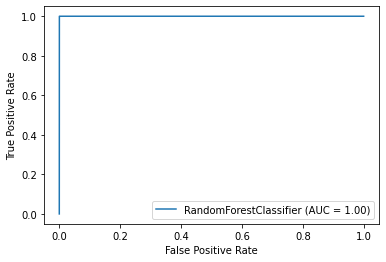

In [ ]:
plot_roc_curve(RF,X,y)

In [ ]:
# MAchine Learning - Supervised Learning - CART - Multi Tree Model
# Ensemble Method - Boosting
# Algorithm - Gradient Boosting Machine 
# GBM is developed to increase accuracy of models or boost wrong or weak
# learners towards right prediction
# Step 1 - Specifiy Number of Trees to be built (n_estimators=1000)
# Step 2 - Creates Sample 1 with 65% of observations and sqrt(num of variables)
# Step 3 - Build Decision Tree for Sample 1
# Step 4 - predict for Decision tree for sample 1
# Step 5 - Identify wrong predictions and move them into Sample 2
# Step 6 - Replenish Sample 2 which already has wrong predictions from
# sample 1 and complete Sample2
# Step 7 - Build Decision Tree for Sample 2 & predict & identify wrong
# predictions and move them to Sample 3. continue Process.

# Trees are build Sequentially as each Tree is dependent on previous trees
# for sample. 
# More weightage is given to wrong predictions in Tree.
# Tree Splitting methods - 1)Gini 2)Entropy & Information gain

# Data without Replacement Method it downgrades those observations that
# are predicted correctly.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm=GradientBoostingClassifier(n_estimators=1000)

In [ ]:
gbmmodel=gbm.fit(X,y)

In [ ]:
gbmmodel.score(X,y)

0.9449350459786893

In [ ]:
cross_val_score(gbm,X,y,cv=5)

array([0.94179894, 0.94015691, 0.94161649, 0.94398321, 0.94133747])

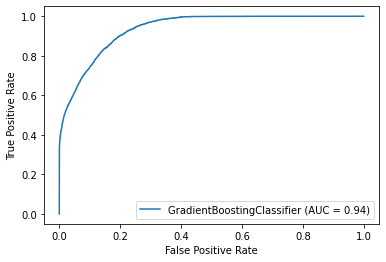

In [ ]:
plot_roc_curve(gbm,X,y)

In [ ]:
RFpredict=RFmodel.predict(hrtestdf)

In [ ]:
pd.DataFrame(RFpredict).to_csv('RF.csv')

In [ ]:
gbmpredict=gbmmodel.predict(hrtestdf)

In [ ]:
pd.DataFrame(gbmpredict).to_csv('gbm.csv')

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb=GaussianNB()

In [ ]:
nbmodel=nb.fit(X,y)

In [ ]:
nbmodel.score(X,y)

0.9127317179973726

In [ ]:
nbpredict=nb.predict(hrtestdf)

In [ ]:
pd.DataFrame(nbpredict).to_csv('nb.csv')

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
binarynb=BernoulliNB()

In [ ]:
binarynbmodel=binarynb.fit(X,y)

In [ ]:
binarynbmodel.score(X,y)

0.9123850532768939

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X.shape

(54808, 12)

In [ ]:
nn=MLPClassifier()

In [ ]:
nnmodel=nn.fit(X,y)

In [ ]:
nnmodel.score(X,y)

0.928587067581375

In [ ]:
nnhrtest=nnmodel.predict(hrtestdf)

In [ ]:
pd.DataFrame(nnhrtest).to_csv('nn.csv')

In [ ]:
import keras
import tensorflow as tf

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

In [ ]:
def create_model(neurons=1):
  model=Sequential()
  model.add(Dense(neurons,input_dim=12,activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam',
                metrics=['accuracy'])
  return model

In [ ]:
model=KerasClassifier(build_fn=create_model,epochs=20,batch_size=50,
                      verbose=1)

In [ ]:
neurons=[20,30,40,50,60]
param_grid=dict(neurons=neurons)

In [ ]:
grid=GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=1)

In [ ]:
grid_result=grid.fit(X,y)

Epoch 1/20
877/877 [==============================] - 12s 1ms/step - loss: 1.4405 - accuracy: 0.7967
Epoch 2/20
877/877 [==============================] - 1s 1ms/step - loss: 0.3043 - accuracy: 0.9121
Epoch 3/20
877/877 [==============================] - 1s 1ms/step - loss: 0.2827 - accuracy: 0.9168
Epoch 4/20
877/877 [==============================] - 1s 1ms/step - loss: 0.2702 - accuracy: 0.9153
Epoch 5/20
877/877 [==============================] - 1s 1ms/step - loss: 0.2604 - accuracy: 0.9176
Epoch 6/20
877/877 [==============================] - 1s 1ms/step - loss: 0.2606 - accuracy: 0.9147
Epoch 7/20
877/877 [==============================] - 1s 1ms/step - loss: 0.2516 - accuracy: 0.9158
Epoch 8/20
877/877 [==============================] - 1s 1ms/step - loss: 0.2497 - accuracy: 0.9165
Epoch 9/20
877/877 [==============================] - 1s 1ms/step - loss: 0.2409 - accuracy: 0.9199
Epoch 10/20
877/877 [==============================] - 1s 1ms/step - loss: 0.2462 - accuracy: 0.918

In [ ]:
grid_result.best_score_

0.9195919752120971

In [ ]:
grid_result.best_params_

{'neurons': 60}